<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/%5B%ED%8C%8C%EC%9D%B4%EC%8D%AC_Basic_Toy_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D_%EC%A0%95%EA%B5%AC%EB%B2%94_%EC%98%A8%EB%9D%BC%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA (Exploratory Data Analysis)
다양한 각도에서 데이터를 관찰하고 이해하는 과정입니다. 데이터의 이해도가 높아지면서 숨겨진 의미를 발견하고 잠재적인 문제를 미리 발견할 수 있습니다. 이를 바탕으로 데이터를 보완하거나 기존의 가설을 수정할 수 있습니다. 

In [ ]:
pip install xlrd==1.2.0

<div class="alert alert-block alert-success">
    <b>목표</b> : 주택가격과 관련 있는 Factor를 찾는다. 
</div>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,225 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and d

데이터를 1) 전처리한 후 분포를 2) 시각화하고 3) 다양한 기준으로 주택 가격을 분석해 보세요.
- 데이터를 분류한 근거를 글로 남겨주세요.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

데이터 살펴보기

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/보스턴주택가격/BostonHousing.xls')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


| 변수 | 설명 |
| ---- | ---- |
| CRIM | 1인당 범죄율 | 
| ZN | 25,000 평방피트를 초과하는 거주지역의 비율 | 
| INDUS | 비소매상업지역 면적 비율 |
| CHAS | 찰스강의 경계에 위치한 경우 1, 아니면 0 |
| NOX | 일산화질소 농도 | 
| RM | 방의 수 |
| AGE | 1940년 이전에 건축된 주택의 비율 |
| DIS | 직업센터까지의 접근성 지수 |
| RAD | 고속도로까지의 접근성 지수 |
| TAX | 재산세율 | 
| PTRATIO | 학생-교사 비율 |
| B | 흑인 비율 |
| LSTAT | 하위 계층 비율 | 
| MEDV | 본인 소유의 주택 가격 (중앙값), 단위 1,000$ |
| CAT.MEDV | MEDV가 30,000을 넘으면 1 아니면 0 |

In [ ]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,-0.151987
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,0.365296
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,-0.366276
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.108631
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,-0.232502
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,0.641265
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,-0.191196
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,0.118887
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,-0.197924
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,-0.273687


## 데이터 타입과 결측값 확인하기

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [ ]:
df.isna().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

결측값 없음.

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'CAT. MEDV'],
      dtype='object')

## 데이터 분포 확인하기



---


**집 평수와 집 값의 관계**





---



집 평수가 넓을 수록 집 값이 비쌀 것이라고 예상하고 비교해보기로 하였다.


방의 수가 많을 수록 집 평 수가 넓다고 가정하였다.

In [ ]:
df['RM'].nunique()

446

446 가짓수 이므로 방의 수를 분류하기로 하였다.

In [ ]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

방의 수의 일의 자리를 기준으로 분류하였다.

In [ ]:
def func(x) :
    if 3 <= x < 4:
        return "3~4"
    elif 4 <= x < 5:
        return "4~5"
    elif 5 <= x < 6:
        return "5~6"
    elif 6 <= x < 7:
        return "6~7"
    elif 7 <= x < 8:
        return "7~8"
    elif 8 <= x < 9:
        return "8~9"

df['방의 수'] = df['RM'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,방의 수
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,6~7
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,6~7
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,7~8
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,6~7
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,7~8


In [ ]:
how = {
    "MEDV" : np.mean
}
t = df.groupby('방의 수').agg(how)
t

,MEDV
방의 수,
3~4,25.300000
4~5,16.023077
5~6,17.487342
6~7,22.015985
7~8,36.917647
8~9,44.200000


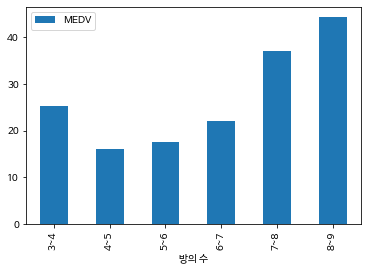

In [ ]:
t.plot.bar()

대체로 방이 많을 수록 집 값이 비싸지만,
 
방이 3~4개인 집이 방이 4개에서 7개 사이의 집보다 비싸게 나타났다. 

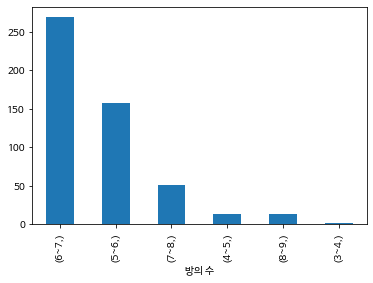

In [ ]:
a = df[['방의 수']].value_counts()
a.plot.bar()

신뢰도를 보기 위해 표본의 수를 파악하였다.
방의 수가 3~4인 표본이 매우 적다는 것을 알 수 있었다.

표본의 수가 적다고 해도 비싼 이유를 알아보기 위해

방의 수가 적지만 집 값이 비싼 이유를 출근까지 걸리는 시간이 짧아서라고 가정했다.

-> 방의 수와 DIS, RAD를 표로 만들었다.

In [ ]:
df2 = df[  ['방의 수', 'RAD', 'DIS', 'MEDV']  ].set_index('방의 수')

In [ ]:
t2 = df2.groupby('방의 수').mean()
t2

,RAD,DIS,MEDV
방의 수,,,
3~4,24.000000,1.561900,25.300000
4~5,19.538462,1.508346,16.023077
5~6,9.740506,3.435396,17.487342
6~7,9.695167,4.037142,22.015985
7~8,5.607843,4.395745,36.917647
8~9,7.461538,3.430192,44.200000



방이 3~4개인 집은 **RAD(고속도로까지 접근성)** 가 매우 높고,  **DIS(직장까지 거리)** 도 가깝기 때문에 집 값이 평수에 비해 비싸게 나올 수 있었다.





집의 평수와 집값은 정비례하지만,

집이 넓지 않아도 출근까지 걸리는 시간이 짧다면 (RAD가 높을수록, DIS가 낮을수록)

좁다는 단점을 보완할 정도로 집 값이 비싸질 수 있다는 결론을 냈다.



---

집 값과 하위 계층 사이의 관계

---



집 값이 싼 곳에 하위계층의 비율이 높을 것이라고 예상하였다.


In [ ]:
df['LSTAT'].nunique()

455

In [ ]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

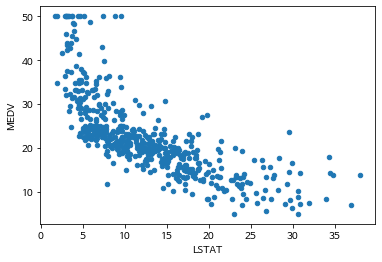

In [ ]:
df.plot.scatter(x='LSTAT', y='MEDV')

표본 수 기준 4분위로 분류하기로 하였다.

In [ ]:
def func(x) :
    if x <= 6.95:
        return "아주 적음"
    elif 6.95 < x <= 11.36:
        return "적음"
    elif 11.36 < x <= 16.955:
        return "많음"
    elif 16.955 < x <= 37.97:
        return "아주 많음"

df['LSTATR'] = df['LSTAT'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,방의 수,LSTATR
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,6~7,아주 적음
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,6~7,적음
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,7~8,아주 적음
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,6~7,아주 적음
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,7~8,아주 적음


In [ ]:
LS = df.groupby('LSTATR').agg(how)
LS

,MEDV
LSTATR,
많음,19.361111
아주 많음,14.014961
아주 적음,32.652756
적음,24.089683


index 위치를 순서대로 바꾸었다.

In [ ]:
LS=LS.reindex(index=['아주 적음','적음','많음','아주 많음'])
LS

,MEDV
LSTATR,
아주 적음,32.652756
적음,24.089683
많음,19.361111
아주 많음,14.014961


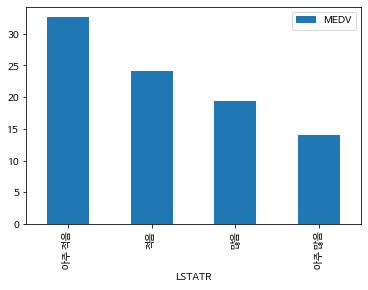

In [ ]:
LS.plot.bar()

하위 계층이 많을수록 집 값이 싸다,

즉 하위계층비율과 집 값은 반비례한다는 결과를 얻을 수 있다.



---

집 값과 비소매상업지역 면적 비율

---
비소매상업지역 면적 비율이 높을 수록 집 값이 싸질 것이라고 예상하였다.


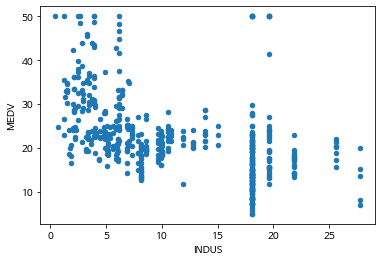

In [ ]:
df.plot.scatter(x='INDUS', y='MEDV')

In [ ]:
df['INDUS'].nunique()

76

In [ ]:
df['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

평균값을 기준으로 분류하기로 하였다.

In [ ]:
def func(x) :
    if x < 11.136779:
        return "평균 미만"
    elif 11.136779 <= x:
        return "평균 이상"


df['INDUSM'] = df['INDUS'].map(func)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,방의 수,LSTATR,INDUSM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,6~7,아주 적음,평균 미만
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,6~7,적음,평균 미만
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,7~8,아주 적음,평균 미만
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,6~7,아주 적음,평균 미만
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,7~8,아주 적음,평균 미만


In [ ]:
IN = df.groupby('INDUSM').agg(how)
IN

,MEDV
INDUSM,
평균 미만,25.697959
평균 이상,18.143396


비소매상업지역 면적 비율이 집 값과 반비례 한다는 결과를 얻었다.

비소매상업지역 면적 비율이 높으면 일산화질소 농도가 높아질 것이라 생각하여 확인했다.

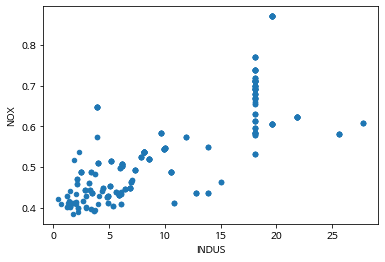

In [ ]:
df.plot.scatter(x='INDUS', y='NOX')



비소매상업지역 면적 비율이 높을수록 집값이 싼 이유는

공장이 많아 일산화질소를 많이 배출하여 거주 시 건강에 악영향을 끼치기 때문이라고 생각하였다.

즉 건강하게 살기 위해, 기대수명을 늘리기 위해 주택이 비싼 것이라고 생각하였다.

기대수명에 악영향을 끼칠 것이라 생각되는 일산화질소 농도와 범죄율 FACTOR를 추가해봤다.



In [ ]:
df['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

집 값을 평균을 기준으로 분류 후 FACTOR 추가

In [ ]:
def func(x) :
    if x < 22.532806:
        return "평균 미만"
    elif 22.532806 <= x:
        return "평균 이상"


df['MEDVM'] = df['MEDV'].map(func)

In [ ]:
INOX = df[  ['INDUS', 'NOX','CRIM', 'MEDVM']  ].set_index('MEDVM')

In [ ]:
ME = INOX.groupby('MEDVM').mean()
ME

,INDUS,NOX,CRIM
MEDVM,,,
평균 미만,13.813266,0.594430,5.563153
평균 이상,7.333349,0.498229,0.842998


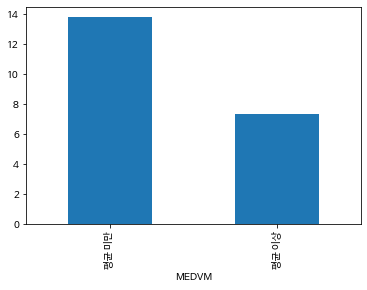

In [ ]:
ME['INDUS'].plot.bar()

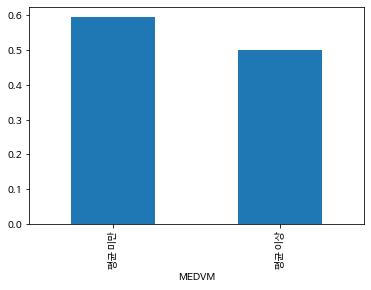

In [ ]:
ME['NOX'].plot.bar()

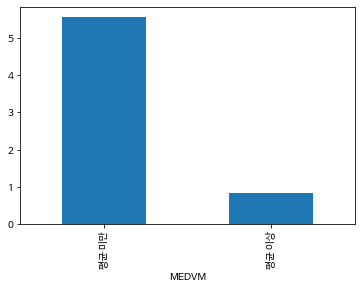

In [ ]:
ME['CRIM'].plot.bar()

기대수명에 악영향을 끼치는 FACTOR들은 모두 집 값이 높을수록 낮아진다.

즉 반비례한다는 사실을 알 수 있었다.

